In [45]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import seed
from random import random
seed(57)

In [46]:
A = []
B = []

for i in range(0,1000):
    a = random()*20-10
    b = random()*20-10
    c = 1
    if ((a-0)**2 + (b-0)**2) > (8**2-1):
        c=0
    A.append([a,b])
    B.append(c)

A = np.array(A)
B = np.array(B)

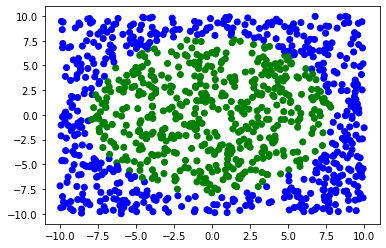

In [47]:
colors = ["green" if label ==1 else "blue" for label in B]
plt.scatter(A[:,0], A[:,1], color=colors)

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(16, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid"),
])

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = "adam",
    metrics = ["accuracy"]
)

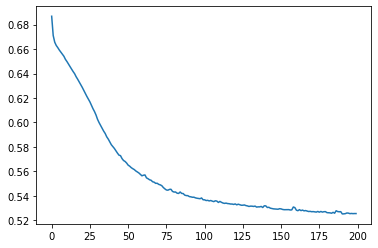

In [49]:
history = model.fit(A[:500], B[:500], epochs=200, verbose=0, shuffle=True)
plt.plot(history.history["loss"])

In [50]:
def plot_decision_boundary(X, Y, model, cmap="Paired"):
    
    cmap=plt.get_cmap(cmap)
    
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    
    steps = 100
    
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, lw=0)
    
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2445c6b48c8>)

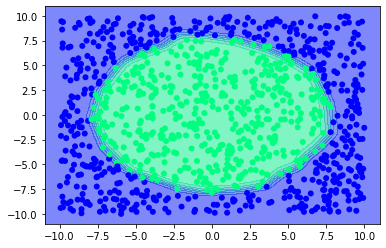

In [51]:
plot_decision_boundary(A, B, model, cmap='winter')

In [52]:
predictions = model.predict(A)
predictions = [1 if p >=.5 else 0 for p in predictions]
correct = 0
t1 = 0
t2 = 0
total = len(predictions)
for i in predictions:
    if (predictions[i]==B[i]):
        correct += 1
    elif (predictions[i]>=B[i]):
        t1 += 1
    else:
        t2 += 1
print("We got {}/{} correct with {}/{} type 2 errors and {}/{} type 1 errors".format(correct,total,t1,total,t2,total))

We got 1000/1000 correct with 0/1000 type 2 errors and 0/1000 type 1 errors
